# Comparación de Cuidados de Instalaciones de Diálisis Trimestrales en Estados Unidos - Junio 2022

El objetivo de este dataset es proporcionar una lista de todas las instalaciones de diálisis registradas en Medicare que incluye direcciones y números de teléfono, así como los servicios y la calidad de atención proporcionados para Junio 2022.

Medicare es un programa de seguro médico del gobierno federal de los Estados Unidos que brinda cobertura de atención médica a personas mayores de 65 años, personas menores de 65 años con ciertas discapacidades y personas con enfermedad renal en etapa terminal. El programa está administrado por los Centros de Servicios de Medicare y Medicaid (CMS) y está financiado por los impuestos de nómina, las primas de los beneficiarios y el presupuesto federal. La cobertura de Medicare incluye servicios hospitalarios, servicios médicos y servicios de medicamentos recetados.

El dataset fue obtenido de:
https://data.cms.gov/provider-data/dataset/23ew-n7w9

In [1]:
print("Tener en cuenta que se utiliza la librería de 'statsmodels', con lo cual para correr este notebbok, debe estar instalado previamente")
# %pip install statsmodels 
# %pip install scikit-learn 
# Sacar "#" si es necesario instalar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from scipy.stats import zscore
plt.style.use("seaborn-v0_8-white")
pd.set_option("display.max_columns", None)

Tener en cuenta que se utiliza la librería de 'statsmodels', con lo cual para correr este notebbok, debe estar instalado previamente


In [2]:
# from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv("DFC_FACILITY.csv", header=0)
df.columns = [c.lower() for c in df.columns.tolist()]
print(f"Tenemos un dataframe de {df.shape[0]} filas y {df.shape[1]} columnas")

Tenemos un dataframe de 7748 filas y 118 columnas


In [4]:
print("Cremos una función ara visualizar el dataframe dado la extensión de columnas")
def analiza_columnas(df, n, indice=0):
    rango = range(n, len(df.columns), n)
    j=0
    for i in rango:
        display(df.iloc[[indice], j:i])
        j=i
    display(df.iloc[[indice], j:len(df)-j])

print('Utilizamos la función "analiza_columnas" para tener una primera impresión del dataset:')
analiza_columnas(df, 10)

Cremos una función ara visualizar el dataframe dado la extensión de columnas
Utilizamos la función "analiza_columnas" para tener una primera impresión del dataset:


,provider number,network,facility name,five star date,five star,five star data availability code,address line 1,address line 2,city,state
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,01Jan2016-31Dec2019,NaN,260.0,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL


,zip,county,phone number,profit or non-profit,chain owned,chain organization,late shift,# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis
0,35233,Jefferson,(205) 638-9275,Non-profit,No,Independent,No,7,Yes,Yes


,offers home hemodialysis training,certification or recertification date,claims date,crownweb date,strr date,percentage of medicare patients with hgb<10 g/dl,hgb<10 data availability code,percentage of medicare patients with hgb>12 g/dl,hgb > 12 data availability code,number of dialysis patients with hgb data
0,Yes,11/17/1982,01JAN2021-31DEC2021,01JAN2021-31DEC2021,01Jan2021-31Dec2021,NaN,199.0,NaN,199.0,5.0


,patient transfusion data availability code,patient transfusion category text,number of patients included in the transfusion summary,percent of adult hd patients with kt/v >= 1.2,adult hd kt/v data availability code,percentage of adult pd pts with kt/v >= 1.7,adult pd kt/v data availability code,percentage of pediatric hd patients with kt/v >= 1.2,pediatric hd kt/v data availability code,number of adult hd patients with kt/v data
0,199.0,Not Available,2.0,NaN,201.0,NaN,199.0,98.0,1.0,0.0


,number of adult hd patient-months with kt/v data,number of adult pd patients with kt/v data,number of adult pd patient-months with kt/v data,number of pediatric hd patients with kt/v data,number of pediatric hd patient-months with kt/v data,hypercalcemia data availability code,number of patients in hypercalcemia summary,number of patient-months in hypercalcemia summary,percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),number of patients in serum phosphorus summary
0,NaN,1.0,2.0,15.0,99.0,199.0,1.0,1.0,NaN,1.0


,number of patient-months in serum phosphorus summary,serum phosphorus data availability code,percentage of adult patients with serum phosphorus less than 3.5 mg/dl,percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl,percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl,percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl,percentage of adult patients with serum phosphorus greater than 7.0 mg/dl,shr date,srr date,smr date
0,2.0,199.0,NaN,NaN,NaN,NaN,NaN,01Jan2021-31Dec2021,01Jan2021-31Dec2021,01Jan2018-31Dec2021


,patient hospitalization category text,patient hospitalization data availability code,patient hospital readmission category,patient hospital readmission data availability code,patient survival category text,patient survival data availability code,number of patients included in hospitalization summary,number of hospitalizations included in hospital readmission summary,number of patients included in survival summary,mortality rate (facility)
0,As Expected,1.0,As Expected,1.0,Not Available,199.0,9.0,12.0,49.0,NaN


,mortality rate: upper confidence limit (97.5%),mortality rate: lower confidence limit (2.5%),readmission rate (facility),readmission rate: upper confidence limit (97.5%),readmission rate: lower confidence limit (2.5%),hospitalization rate (facility),hospitalization rate: upper confidence limit (97.5%),hospitalization rate: lower confidence limit (2.5%),number of pediatric pd patients with kt/v data,pediatric pd kt/v data availability code
0,NaN,NaN,28.5,63.0,6.6,173.6,462.4,67.2,16.0,1.0


,number of pediatric pd patient-months with kt/v data,percentage of pediatric pd patients with kt/v>=1.8,sir date,patient infection data availability code,patient infection category text,standard infection ratio,sir: upper confidence limit (97.5%),sir: lower confidence limit (2.5%),transfusion rate (facility),transfusion rate: upper confidence limit (97.5%)
0,138.0,79.0,01Jan2021-31Dec2021,201.0,Not Available,NaN,NaN,NaN,NaN,NaN


,transfusion rate: lower confidence limit (2.5%),fistula data availability code,fistula category text,number of patients included in fistula summary,fistula rate (facility),fistula rate: upper confidence limit (97.5%),fistula rate: lower confidence limit (2.5%),number of patients in long term catheter summary,number of patient months in long term catheter summary,long term catheter data availability code
0,NaN,201.0,Not Available,0.0,NaN,NaN,NaN,0.0,NaN,201.0


,percentage of adult patients with long term catheter in use,number of patients in npcr summary,number of patient-months in npcr summary,npcr data availability code,percentage of pediatric hd patients with npcr,swr date,swr category text,patient transplant waitlist data availability code,95% c.i. (upper limit) for swr,95% c.i. (lower limit) for swr
0,NaN,20.0,164.0,1.0,91.0,01Jan2018-31Dec2020,As Expected,1.0,1.76,0.34


,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,pppw category text,patient prevalent transplant waitlist data availability code,95% c.i. (upper limit) for pppw,95% c.i. (lower limit) for pppw,number of patients for pppw,percentage of prevalent patients waitlisted
0,34.0,0.85,As Expected,1.0,49.4,8.4,38.0,23.0


In [5]:
data_availability_columns = df.columns[df.columns.to_series().str.contains("data availability")==True].tolist()[1:]
df = df[[c for c in df.columns.values.tolist() if c not in data_availability_columns]]
print("Dada la extensidad de columnas eliminamos las que no vamos a necesitar para trabajar el dataset.")
print(f"Esto nos deja un dataset con un total de {df.shape[1]} columnas.")

Dada la extensidad de columnas eliminamos las que no vamos a necesitar para trabajar el dataset.
Esto nos deja un dataset con un total de 100 columnas.


In [6]:
df = df[df['five star data availability code']==1.0]
print(f"Procedemos a eliminar las filas que indican que la información no está disponible.\n"
      f"En este caso, solo las observaciones con un código igual a 1.0.")
print(f"Ahora tenemos un dataframe de {df.shape[0]} filas y {df.shape[1]} columnas.")

Procedemos a eliminar las filas que indican que la información no está disponible.
En este caso, solo las observaciones con un código igual a 1.0.
Ahora tenemos un dataframe de 6731 filas y 100 columnas.


In [7]:
print("Eliminamos, en caso de existir, las calificaciones nulas.")
print(f"No se encontraron valores nulos." if df.dropna(subset=["five star"])["five star"].value_counts().sum() == df.shape[0] else
      f"Se encontraron {df.shape[0] - df.dropna(subset=['five star'])['five star'].value_counts().sum()} valores nulos.")

Eliminamos, en caso de existir, las calificaciones nulas.
No se encontraron valores nulos.


Para este análisis, vamos a enfocarnos en los indicadores agregados por Estado. Dada la complejidad y extensión del dataset, decidimos hacer hincapié en las variables que afectan la calificación promedio de los centros médicos de cada Estado. 

In [8]:
print("Armamos un dataset agrupado por estado para analizar los datos de manera agregada.")
print('Alguno datos son símil booleanos con respuestas del tipo "yes" y "no".')
print("Primero creamos la función para cambiarlos.")

def count_yes(x):
    return (x == "Yes").sum()/ x.value_counts().sum()

print("Cargamos el dataset de estados con sus respectivos datos de gdp, población y superficie. Solo estados continentales.")
df_states_csv = pd.read_csv("usa_states_gdp.csv", header=0, sep=";").set_index("ab")[:-5]
df_states_agg = df.groupby("state").agg({"five star": "mean",
                                        "mortality rate (facility)": "mean",
                                        "# of dialysis stations": "mean",
                                        "offers in-center hemodialysis": lambda x: count_yes(x),
                                        "offers peritoneal dialysis": lambda x: count_yes(x),
                                        "offers home hemodialysis training": lambda x: count_yes(x),
                                        "percentage of medicare patients with hgb<10 g/dl": "mean",
                                        "percentage of medicare patients with hgb>12 g/dl": "mean",
                                        "percent of adult hd patients with kt/v >= 1.2": "mean",
                                        "percentage of adult pd pts with kt/v >= 1.7": "mean",
                                        "percentage of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)": "mean",
                                        "percentage of adult patients with serum phosphorus less than 3.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 3.5-4.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 4.6-5.5 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus between 5.6-7.0 mg/dl": "mean",
                                        "percentage of adult patients with serum phosphorus greater than 7.0 mg/dl": "mean",
                                        "readmission rate (facility)": "mean",
                                        "hospitalization rate (facility)": "mean",
                                        "standard infection ratio": "mean",
                                        "transfusion rate (facility)": "mean",
                                        "fistula rate (facility)": "mean",
                                        "percentage of adult patients with long term catheter in use": "mean",
                                        "number of patients in this facility for swr": "mean",
                                        "standardized first kidney transplant waitlist ratio": "mean",
                                        "number of patients for pppw": "mean",
                                        "percentage of prevalent patients waitlisted": "mean",
                                        "facility name": "count"
                                         })
df_states_agg = pd.merge(df_states_agg, df_states_csv, left_index=True, right_index=True)
df_states_agg["mortality ratio / hospitalization ratio"] = df_states_agg["mortality rate (facility)"] /\
                                                            df_states_agg["hospitalization rate (facility)"]
df_states_agg = df_states_agg.rename(columns={"facility name": "number of facilities"})
df_states_agg.columns = [c.replace("percentage", "%").replace(r"\(.*\)", "", True).replace("serum phosphorus", "serum PO4") 
                         for c in df_states_agg.columns]
# columnas_numericas = df_states_agg.select_dtypes(include='number').columns
# df_states_agg[columnas_numericas] = PowerTransformer().fit_transform(df_states_agg[columnas_numericas])
print("Vemos como queda el dataframe nuevo:")
display(df_states_agg.head(5))
display(f"Hay {df_states_agg.isna().sum().sum()} valores nulos")

Armamos un dataset agrupado por estado para analizar los datos de manera agregada.
Alguno datos son símil booleanos con respuestas del tipo "yes" y "no".
Primero creamos la función para cambiarlos.
Cargamos el dataset de estados con sus respectivos datos de gdp, población y superficie. Solo estados continentales.


Vemos como queda el dataframe nuevo:


,five star,mortality rate (facility),# of dialysis stations,offers in-center hemodialysis,offers peritoneal dialysis,offers home hemodialysis training,% of medicare patients with hgb<10 g/dl,% of medicare patients with hgb>12 g/dl,percent of adult hd patients with kt/v >= 1.2,% of adult pd pts with kt/v >= 1.7,% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl),% of adult patients with serum PO4 less than 3.5 mg/dl,% of adult patients with serum PO4 between 3.5-4.5 mg/dl,% of adult patients with serum PO4 between 4.6-5.5 mg/dl,% of adult patients with serum PO4 between 5.6-7.0 mg/dl,% of adult patients with serum PO4 greater than 7.0 mg/dl,readmission rate (facility),hospitalization rate (facility),standard infection ratio,transfusion rate (facility),fistula rate (facility),% of adult patients with long term catheter in use,number of patients in this facility for swr,standardized first kidney transplant waitlist ratio,number of patients for pppw,% of prevalent patients waitlisted,number of facilities,state,population,total area,land area,real gdp,mortality ratio / hospitalization ratio
AK,4.777778,18.922222,17.777778,1.000000,0.666667,0.444444,22.000000,0.000000,98.000000,94.500000,0.777778,9.222222,24.444444,25.444444,23.000000,17.666667,22.385714,99.600000,0.477778,27.037500,72.122222,11.777778,34.333333,0.802500,77.111111,17.633333,9,Alaska,733391,1723337,570641,57349,0.189982
AL,3.843373,22.455422,17.126506,0.951807,0.379518,0.271084,19.714286,0.210884,97.220126,93.296296,1.222892,6.933735,21.379518,28.210843,23.927711,19.590361,24.774691,129.607229,0.338000,35.172143,53.709816,10.588957,28.331325,0.584028,58.969880,12.424699,166,Alabama,5024279,135767,50645,25411,0.173257
AR,3.446154,24.490769,17.584615,1.000000,0.492308,0.200000,21.879310,0.724138,96.562500,91.304348,1.828125,6.562500,19.937500,29.281250,23.015625,21.296875,26.571875,142.792308,0.356441,47.952632,57.990625,17.734375,41.830769,0.617692,77.738462,7.766129,65,Arkansas,3011524,137732,52035,148676,0.171513
AZ,3.973684,22.509649,18.833333,0.973684,0.385965,0.122807,18.884615,0.259615,97.144144,94.466667,1.166667,7.500000,22.456140,29.692982,22.771930,17.649123,25.553982,150.786842,0.354545,28.154000,66.797321,14.026786,42.912281,0.640000,86.078947,9.870175,114,Arizona,7151502,295234,113594,420027,0.149281
CA,3.734300,20.832528,21.673108,0.921095,0.487923,0.198068,15.963158,0.484211,96.834495,90.532407,1.988728,7.173139,23.582524,31.555016,21.770227,15.904531,26.411075,127.882068,0.413827,27.412500,64.971574,14.338409,41.655395,1.018076,94.668277,26.379871,621,California,39538223,423967,155779,3373241,0.162904


'Hay 0 valores nulos'

En este paso, se eligen las columnas finales que se utilizarán en el dataframe. Se agregan variables geográficas que podrían arrojar luz sobre las diferencias de calificación de los estados. Por último, se agrega el cociente de la tasa de mortalidad sobre tasa de hospitalización y el número de centros que tiene cada estado. Cabe destacar que se toman los valores promedios para las variables provistas por el dataset.

Hay 51 estados con instalaciones de dialisis de Medicare.
NaN valores por columna: 0
Las 10 principales estados con el promedio de calificación más alto:
* Alaska
* Colorado
* Utah
* Kansas
* Maine
* Wyoming
* Iowa
* Idaho
* Oregon
* Connecticut
Los 10 principales estados con la calificación promedio más baja:
* Texas
* Maryland
* Tennessee
* Georgia
* Arkansas
* Nevada
* New York
* Florida
* West Virginia
* Vermont
Creamos un dataframe con las diferencias entre variables promedio para analizar donde se diferencian los estados.
Lo utilizamos para hacer un gráfico de barras.


Text(0.5, 1.0, 'Diferencias entre indicadores promedio para el agrupamiento de los 10 mejores estados calificados vs. los 10 peores.')

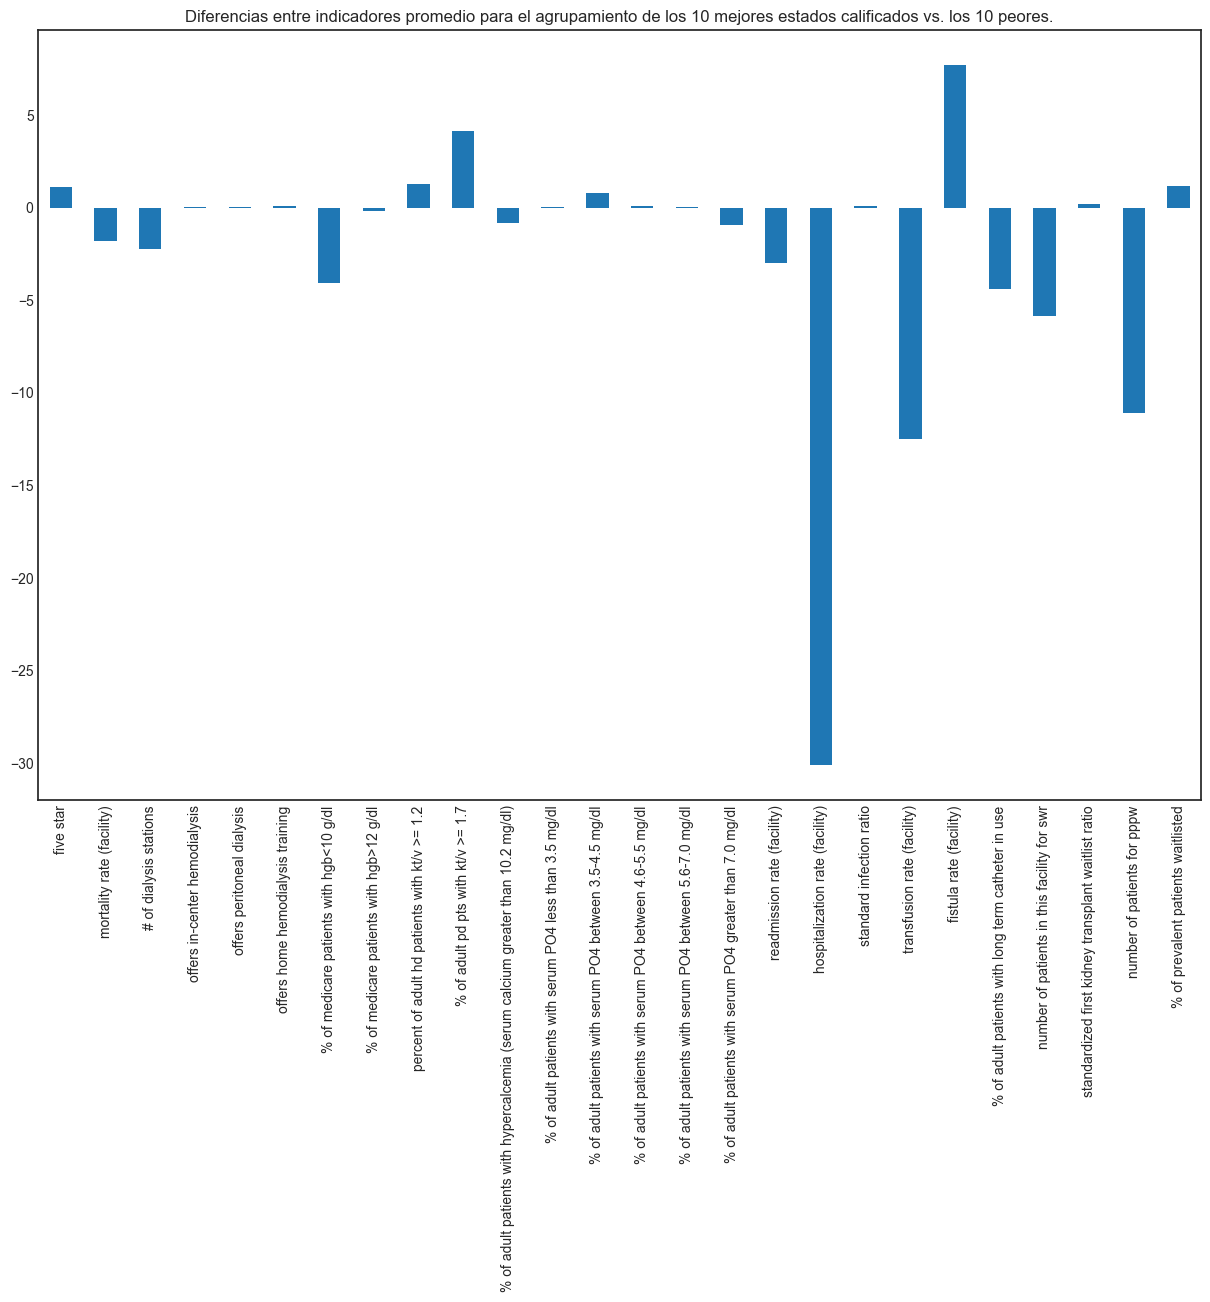

In [9]:
print(f"Hay {len(df_states_agg)} estados con instalaciones de dialisis de Medicare.")
print(f"NaN valores por columna: {df_states_agg.isna().sum().sum()}")

print("Las 10 principales estados con el promedio de calificación más alto:")
mejores_10 = df_states_agg.sort_values(by="five star", ascending=False).head(10)["state"].values.tolist()
for i in mejores_10:
    print(f"* {i}")

print("Los 10 principales estados con la calificación promedio más baja:")
peores_10 = df_states_agg.sort_values(by="five star", ascending=False).tail(10)["state"].values.tolist()
for i in peores_10:
    print(f"* {i}")

df_mejores_10 = df_states_agg.loc[df_states_agg["state"].isin(mejores_10)].drop(columns="state").mean()
df_peores_10 = df_states_agg.loc[df_states_agg["state"].isin(peores_10)].drop(columns="state").mean()
df_mejores_peores = pd.concat([df_mejores_10, df_peores_10], axis=1)
df_mejores_peores = df_mejores_peores[0] - df_mejores_peores[1]

print("Creamos un dataframe con las diferencias entre variables promedio para analizar donde se diferencian los estados.\n"
      "Lo utilizamos para hacer un gráfico de barras.")

fig, ax = plt.subplots(figsize=(15,10))
df_mejores_peores.loc[:"% of prevalent patients waitlisted"].plot.bar(ax)
ax.set_title("Diferencias entre indicadores promedio para el agrupamiento de los 10 mejores estados calificados vs. los 10 peores.")


Se observa que la diferencia de calificación entre los estados mejor posicionados, respecto de los peores,
tiene que ver con mejores tasas de uso de fistula (deseable sobre otros métodos de dialisis) o de porcentaje alto de pacientes
con un Kt/V>=1.7 (se utiliza como umbral asociado a valores exitosos de tratamiento).
A su vez, afectaría negativamente una tasa de hospítalización mayor, como también de transfusión y de lista de espera de 
pacientes prevalentes para trasplante (ver gráfico con diferencias entre valores promedios).

La clasificación promedio del dataset es de 3.8.
Se puede observar que un 92% de los centros médicos tienen una calificación mayor a 3.0.
El mayor número de centros médicos se encuentran en el bucket de calificación entre 3.0 y 4.0 puntos con un total de 2291.
En el gráfico de dispersión, se puede observar una relación entre la calificación del centro médico y la tasa de mortalidad.
En este caso, la clasificación respecto de la tasa de mortalidad presenta importante dispersión.
El coeficiente de correlación de Pearson al cuadrado (r^2) es: 0.14
La tasa de mortalidad no presenta correlación significativa (observado en el coeficiente, como también gráficamente)
con la calificación del centro médico.


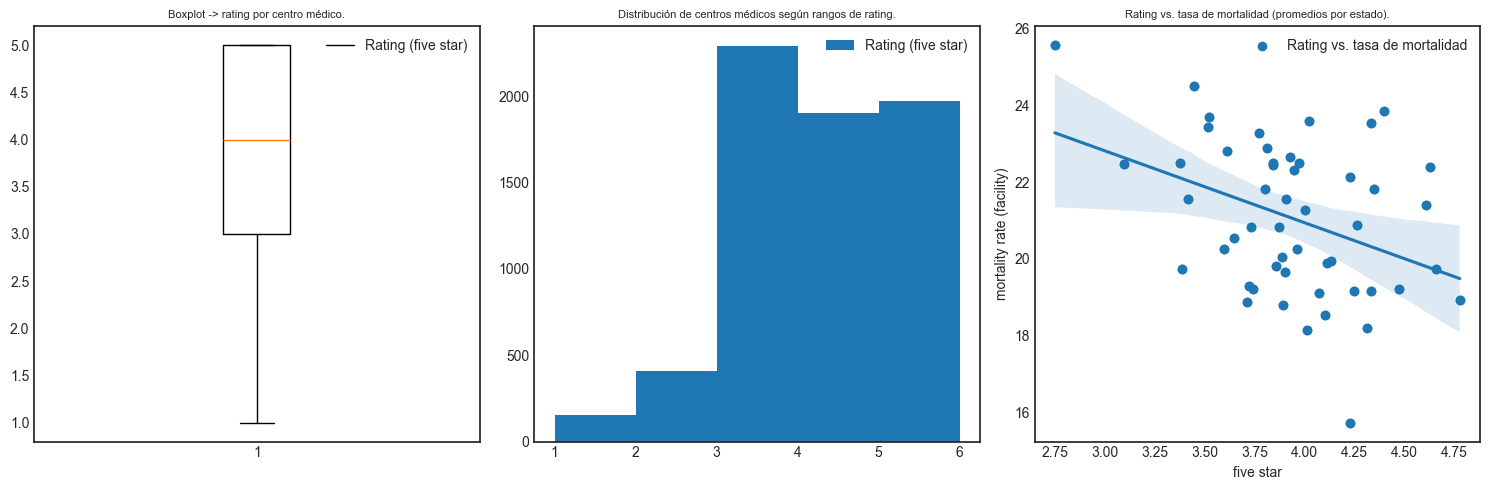

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.boxplot(df["five star"])
n, bins, patches = ax2.hist(df["five star"], bins=[1,2,3,4,5,6])
ax3.scatter(df_states_agg["five star"], df_states_agg["mortality rate (facility)"])
sns.regplot(x="five star", y="mortality rate (facility)",
            data=df_states_agg.loc[:, ["five star", "mortality rate (facility)"]],
            robust=True, ax=ax3)     
ax1.legend(["Rating (five star)"])
ax2.legend(["Rating (five star)"])
ax3.legend(["Rating vs. tasa de mortalidad"])
for i in range(len(patches)):
    plt.annotate(str(int(n[i])), xy=(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height()), 
                 ha='center', va='bottom')
ax1.set_title("Boxplot -> rating por centro médico.", fontsize=8)
ax2.set_title("Distribución de centros médicos según rangos de rating.", fontsize=8)
ax3.set_title("Rating vs. tasa de mortalidad (promedios por estado).", fontsize=8)
# plt.show()
# plt.clf()

mean_rating = round(df["five star"].mean(), 1)
print(f"La clasificación promedio del dataset es de {mean_rating}.")
print(f"Se puede observar que un {sum(n[2:])/sum(n):.0%} de los centros médicos tienen una calificación mayor a {bins[2]}.\n"
        f"El mayor número de centros médicos se encuentran en el bucket de calificación entre {bins[2]} y {bins[3]} puntos "
        f"con un total de {n[2]:.0f}.")
print(f"En el gráfico de dispersión, se puede observar una relación entre la calificación del centro médico y la tasa de mortalidad.")

# r cuadrado
hosp_rate = df_states_agg["five star"]
mort_rate = df_states_agg["mortality rate (facility)"]
r2 = np.corrcoef(hosp_rate, mort_rate)[0,1]**2
print("En este caso, la clasificación respecto de la tasa de mortalidad presenta importante dispersión.")
print("El coeficiente de correlación de Pearson al cuadrado (r^2) es: {:.2f}".format(r2))
print("La tasa de mortalidad no presenta correlación significativa (observado en el coeficiente, como también gráficamente)\n"
      "con la calificación del centro médico.")
plt.tight_layout()

Como se explica anteriormente, los ratings se concentran principalmente entre los valores de 3 a 5 (primer gráfico), promediando 3.8 de puntaje. En el segundo gráfico, la distribución se nota más claramente. En tanto que para el último gráfico, el objetivo es identificar visualmente una posible relación entre la tasa promedio de mortalidad de cada estado respecto de su califiación promedio. Se concluye, que no hay evidencia suficiente, a priori, para afirmar la relación.

La tasa de hospitalización máxima que podemos observar es: 4667.0
La tasa de hospitalización mínima que podemos observar es: 8.0
La tasa de mortalidad máxima que podemos observar es: 4504.0
La tasa de mortalidad mínima que podemos observar es: 4.0
En este caso, la tasa hospitalización respecto de la tasa de mortalidad presenta importante dispersión.
El coeficiente de correlación de Pearson al cuadrado (r^2) es: 0.03
La tasa de mortalidad no presenta correlación significativa (observado en el coeficiente, como también gráficamente)
respecto de la tasa de hospitalización.


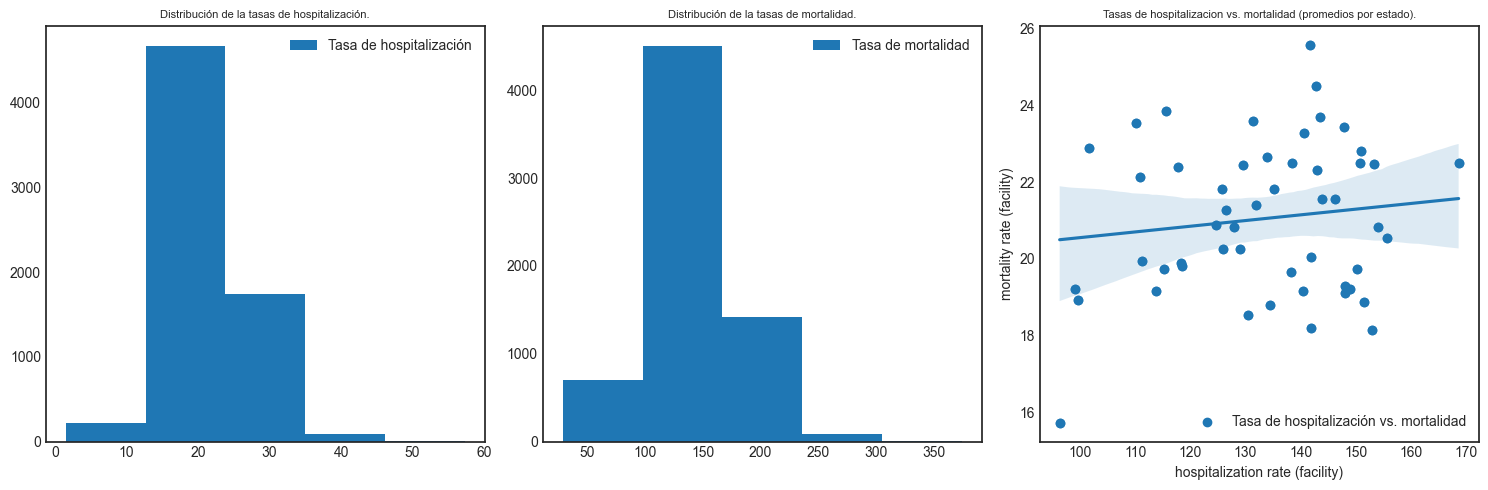

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
n1, bins1, patches1 = ax1.hist(df["mortality rate (facility)"], bins=5)
n2, bins2, patches2 = ax2.hist(df["hospitalization rate (facility)"], bins=5)
ax3.scatter(df_states_agg["hospitalization rate (facility)"], df_states_agg["mortality rate (facility)"])
sns.regplot(x="hospitalization rate (facility)", y="mortality rate (facility)",
            data=df_states_agg.loc[:, ["hospitalization rate (facility)", "mortality rate (facility)"]],
            robust=True)     
ax1.legend(["Tasa de hospitalización"])
ax2.legend(["Tasa de mortalidad"])
ax3.legend(["Tasa de hospitalización vs. mortalidad"])
for i in range(len(patches1)):
    plt.annotate(str(int(n1[i])), xy=(patches1[i].get_x() + patches1[i].get_width()/2, patches1[i].get_height()), 
                 ha='center', va='bottom')
for i in range(len(patches2)):
    plt.annotate(str(int(n2[i])), xy=(patches2[i].get_x() + patches2[i].get_width()/2, patches2[i].get_height()), 
                 ha='center', va='bottom')
ax1.set_title("Distribución de la tasas de hospitalización.", fontsize=8)
ax2.set_title("Distribución de la tasas de mortalidad.", fontsize=8)
ax3.set_title("Tasas de hospitalizacion vs. mortalidad (promedios por estado).", fontsize=8)

# máximos y mínimos del primer histograma
max_hosp_rate = max(n1)
min_hosp_rate = min(n1)
print("La tasa de hospitalización máxima que podemos observar es: {}".format(max_hosp_rate))
print("La tasa de hospitalización mínima que podemos observar es: {}".format(min_hosp_rate))

# máximos y mínimos del segundo histograma
max_mort_rate = max(n2)
min_mort_rate = min(n2)
print("La tasa de mortalidad máxima que podemos observar es: {}".format(max_mort_rate))
print("La tasa de mortalidad mínima que podemos observar es: {}".format(min_mort_rate))  

# r cuadrado
hosp_rate = df_states_agg["hospitalization rate (facility)"]
mort_rate = df_states_agg["mortality rate (facility)"]
r2 = np.corrcoef(hosp_rate, mort_rate)[0,1]**2
print("En este caso, la tasa hospitalización respecto de la tasa de mortalidad presenta importante dispersión.")
print("El coeficiente de correlación de Pearson al cuadrado (r^2) es: {:.2f}".format(r2))
print("La tasa de mortalidad no presenta correlación significativa (observado en el coeficiente, como también gráficamente)\n"
      "respecto de la tasa de hospitalización.")
plt.tight_layout()

En este caso, la tasa de mortalidad y de hospitalización parecerían tener distribuciones similares. En cuanto a una posible relación positiva entre ambos, por el momento no hay evidencia suficiente para afirmar el supuesto. Presenta importante dispersión y correlación baja.

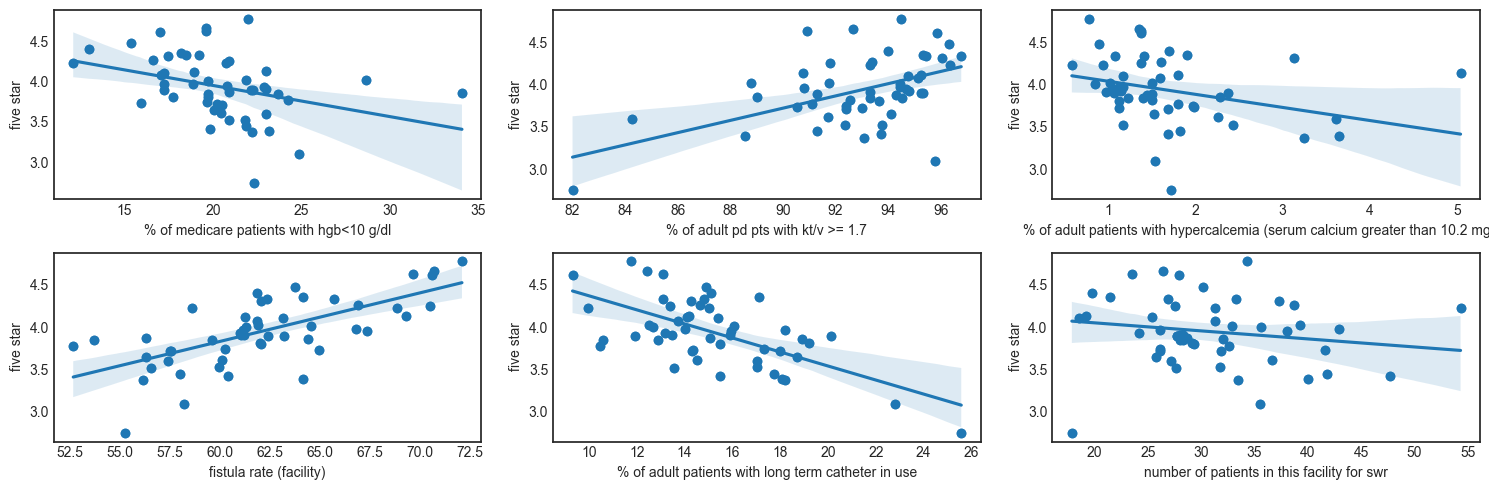

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0,0].scatter(df_states_agg["% of medicare patients with hgb<10 g/dl"], df_states_agg["five star"])
sns.regplot(x="% of medicare patients with hgb<10 g/dl", y="five star",
            data=df_states_agg.loc[:, ["% of medicare patients with hgb<10 g/dl", "five star"]],
            robust=True, ax=ax[0,0])
ax[0,1].scatter(df_states_agg["% of adult pd pts with kt/v >= 1.7"], df_states_agg["five star"])
sns.regplot(x="% of adult pd pts with kt/v >= 1.7", y="five star",
            data=df_states_agg.loc[:, ["% of adult pd pts with kt/v >= 1.7", "five star"]],
            robust=True, ax=ax[0,1])
ax[0,2].scatter(df_states_agg["% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)"], df_states_agg["five star"])
sns.regplot(x="% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)", y="five star",
            data=df_states_agg.loc[:, ["% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)", "five star"]],
            robust=True, ax=ax[0,2])
ax[1,0].scatter(df_states_agg["fistula rate (facility)"], df_states_agg["five star"])
sns.regplot(x="fistula rate (facility)", y="five star",
            data=df_states_agg.loc[:, ["fistula rate (facility)", "five star"]],
            robust=True, ax=ax[1,0])
ax[1,1].scatter(df_states_agg["% of adult patients with long term catheter in use"], df_states_agg["five star"])
sns.regplot(x="% of adult patients with long term catheter in use", y="five star",
            data=df_states_agg.loc[:, ["% of adult patients with long term catheter in use", "five star"]],
            robust=True, ax=ax[1,1])
ax[1,2].scatter(df_states_agg["number of patients in this facility for swr"], df_states_agg["five star"])
sns.regplot(x="number of patients in this facility for swr", y="five star",
            data=df_states_agg.loc[:, ["number of patients in this facility for swr", "five star"]],
            robust=True, ax=ax[1,2])
plt.tight_layout()

Se puede ver en los gráficos que una mayor concentración de observaciones de pacientes con hemoglobina baja, como también
de un bajo porcentaje de pacientes con hipercalcemia, indica una posible relación negativa con la clasificación del centro médico.
Se puede ver en los gráficos una mayor concentración de observaciones de porcentaje alto de pacientes con Kt/v>=1.7
se relacionan con valores de rating alto.
Esto podría deberse a que valores mayores de Kt/v (en este caso, un mayor número de paciente con Kt/v>=1.7)
están asociados con mejores resultados en las dialisis.
Para el caso de la tasa de fistula y de porcentaje de pacientes con catéter (a largo plazo), gráficamente se comportan como
indica el documento. Siendo la tasa de uso de fistula correlacionada con mejores resultados y menores complicaciones respecto
del uso de catéter.

Observamos histogramas de las variables, para tener una idea general de sus distribuciones:


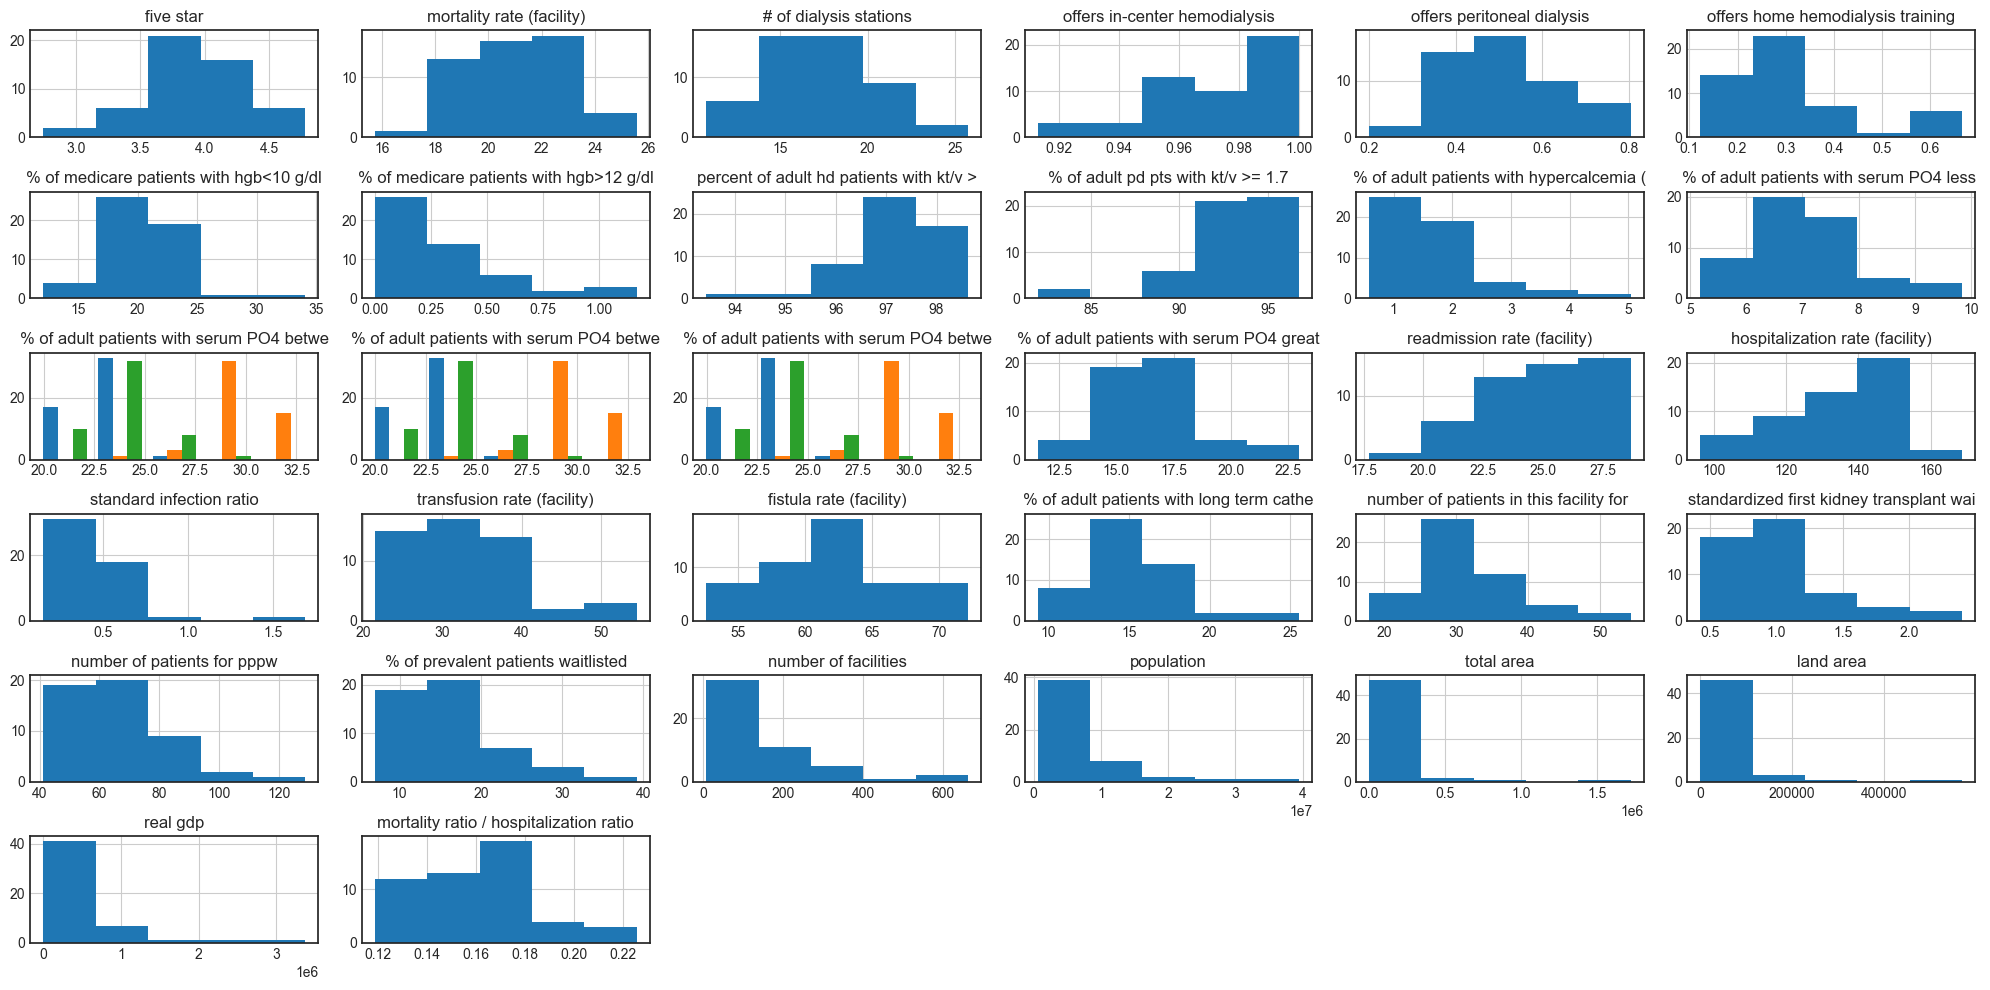

In [13]:
print("Observamos histogramas de las variables, para tener una idea general de sus distribuciones:")
df_states_agg.rename(columns={c: c[:40] for c in df_states_agg.columns}).hist(figsize=(20,10), bins=5)
plt.tight_layout()
# plt.show()
# plt.clf()

El objetivo de una representación gráfica de los histogramas de las variables, es encontrar las distribuciones que tienen. Sabiendo como se comportan es más simple arribar a conclusiones o validar métodos estadísticos y sus respectivos resultados.

Pairplot sobre variables restantes, no analizadas previamente.


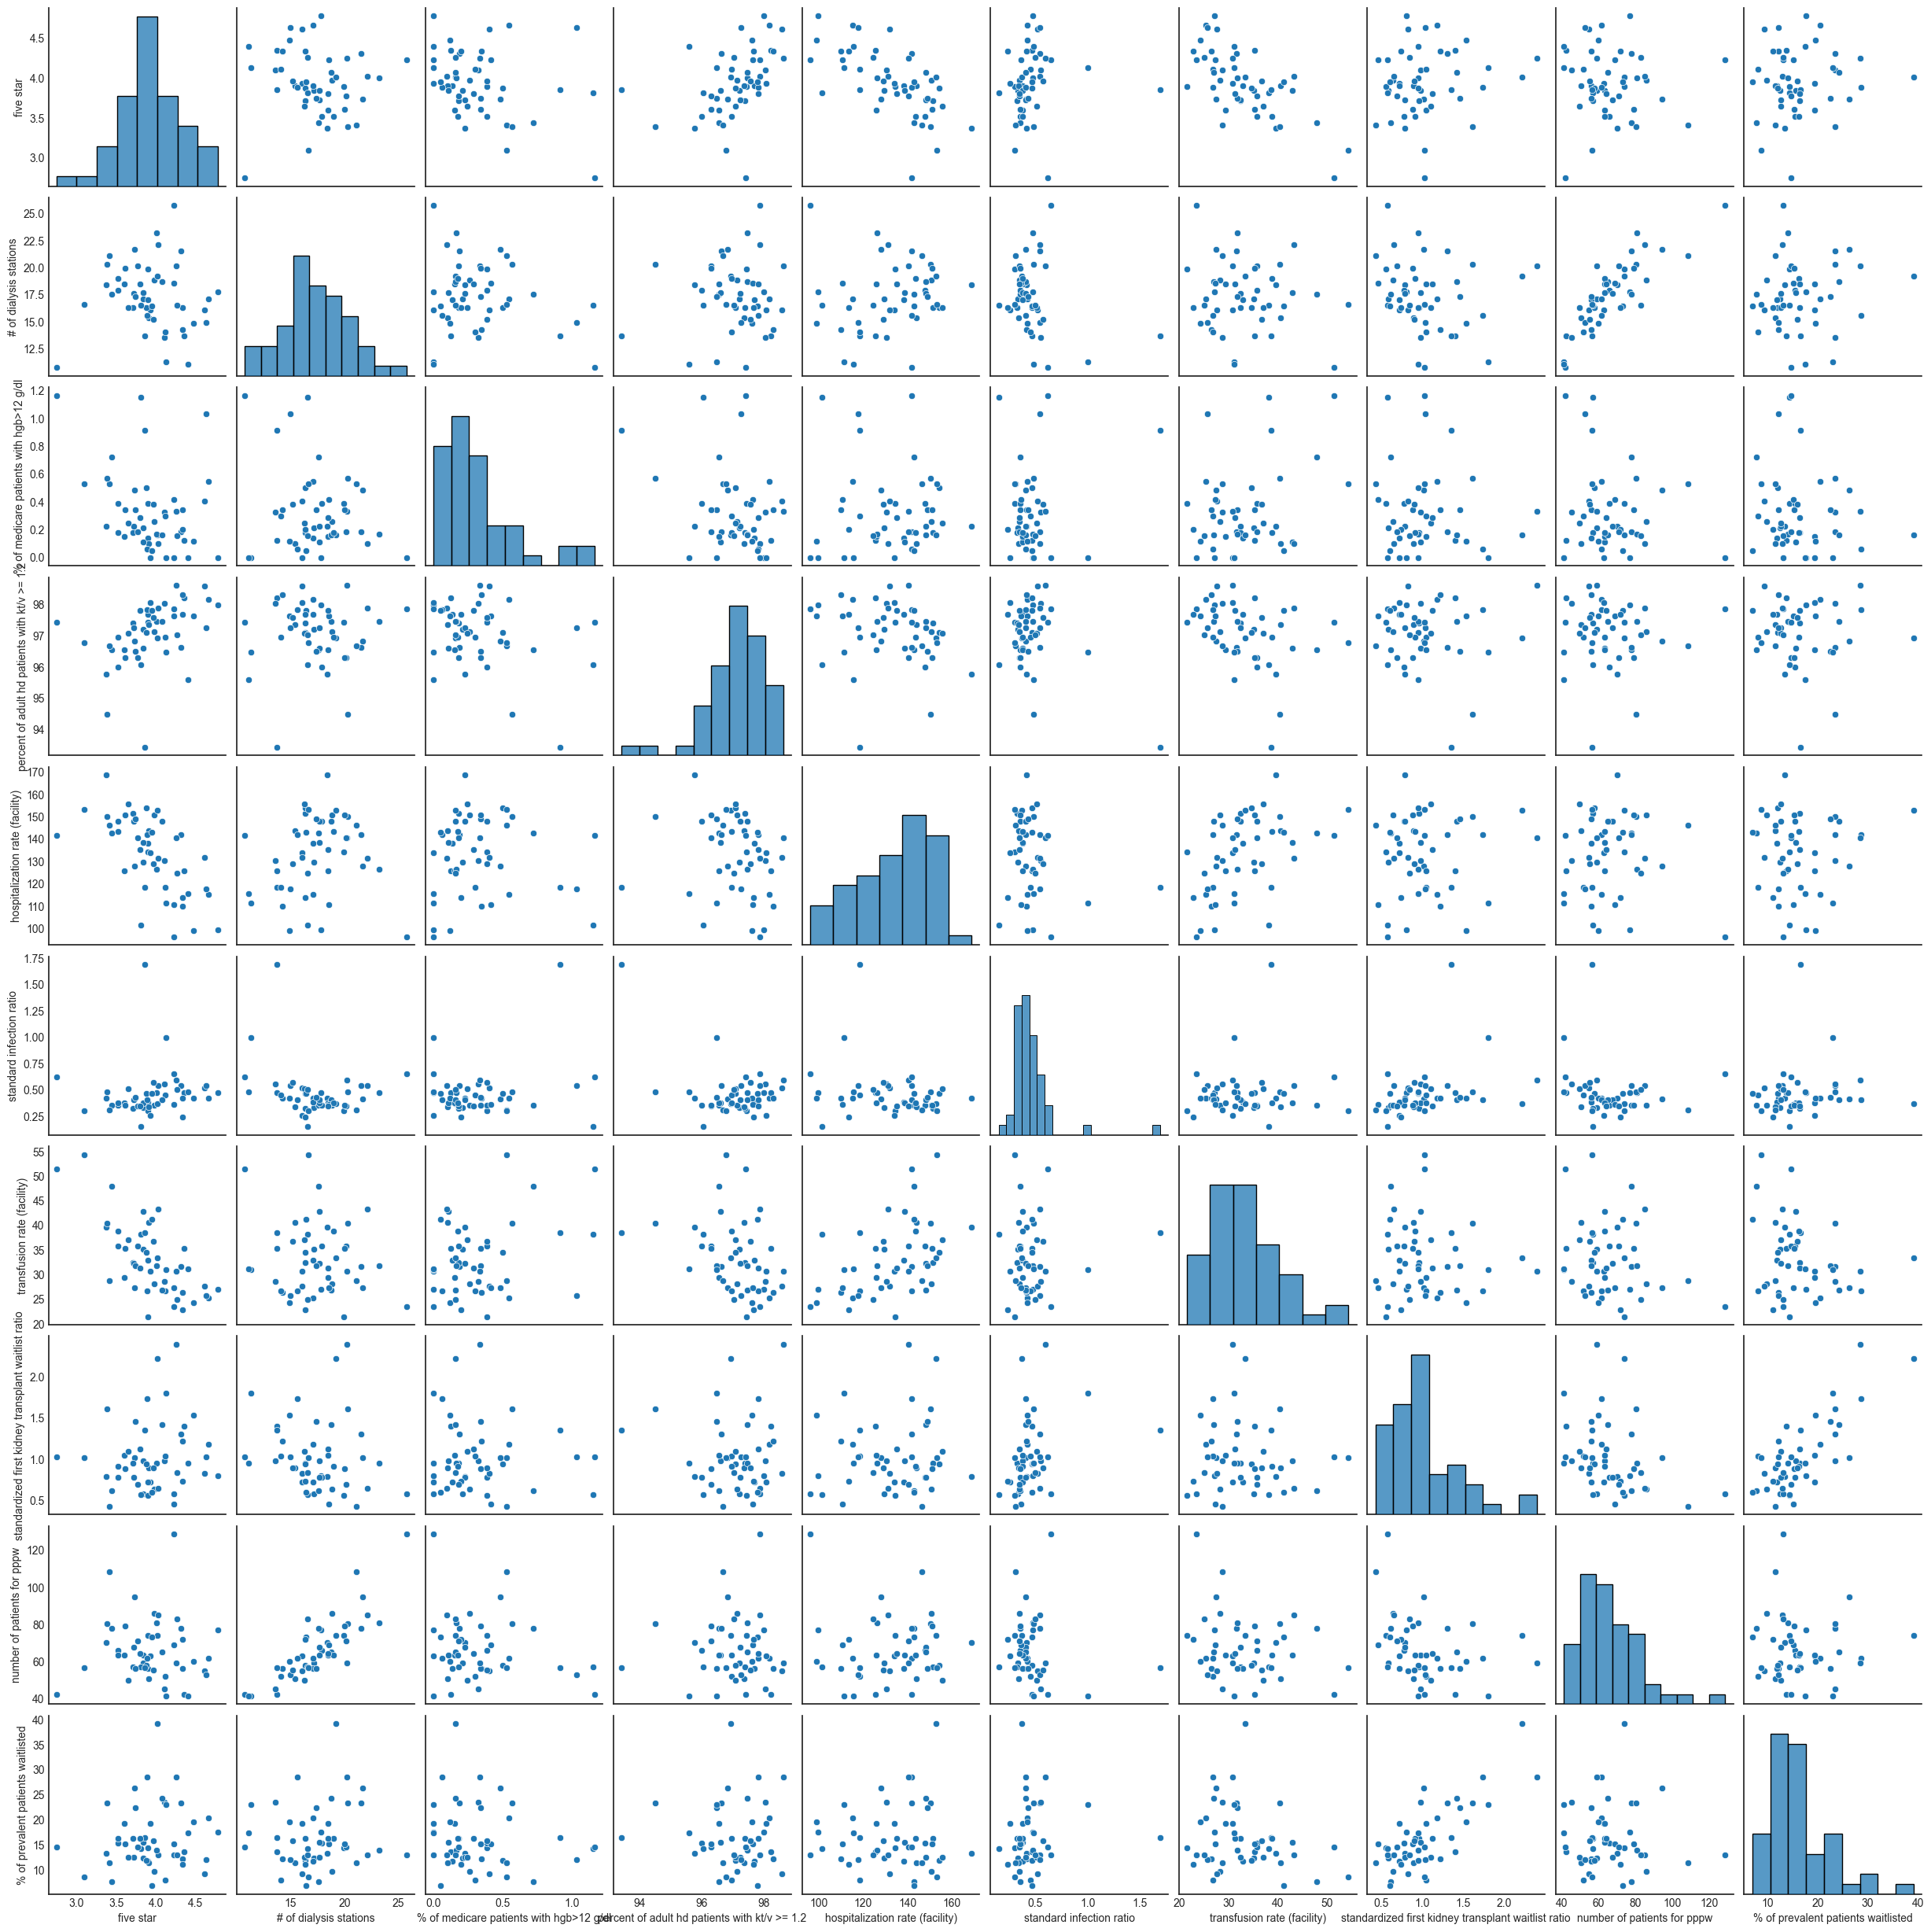

In [14]:
print("Pairplot sobre variables restantes, no analizadas previamente.")
sns.pairplot(df_states_agg[["five star",
                        "# of dialysis stations",
                        "% of medicare patients with hgb>12 g/dl",
                        "percent of adult hd patients with kt/v >= 1.2",
                        "hospitalization rate (facility)",
                        "standard infection ratio",
                        "transfusion rate (facility)",
                        "standardized first kidney transplant waitlist ratio",
                        "number of patients for pppw",
                        "% of prevalent patients waitlisted"]])

En este caso, el pairplot busca graficar las variables que consideramos menos significativas, pero que aún así pueden aportar información. En otros casos, donde no se toman ciertos supuestos (como hacemos en este análisis), sirve para tener una primera observación general de las variables.

Distribuciones y dispersiones para las variables geográficas y la calificación promedio por estado


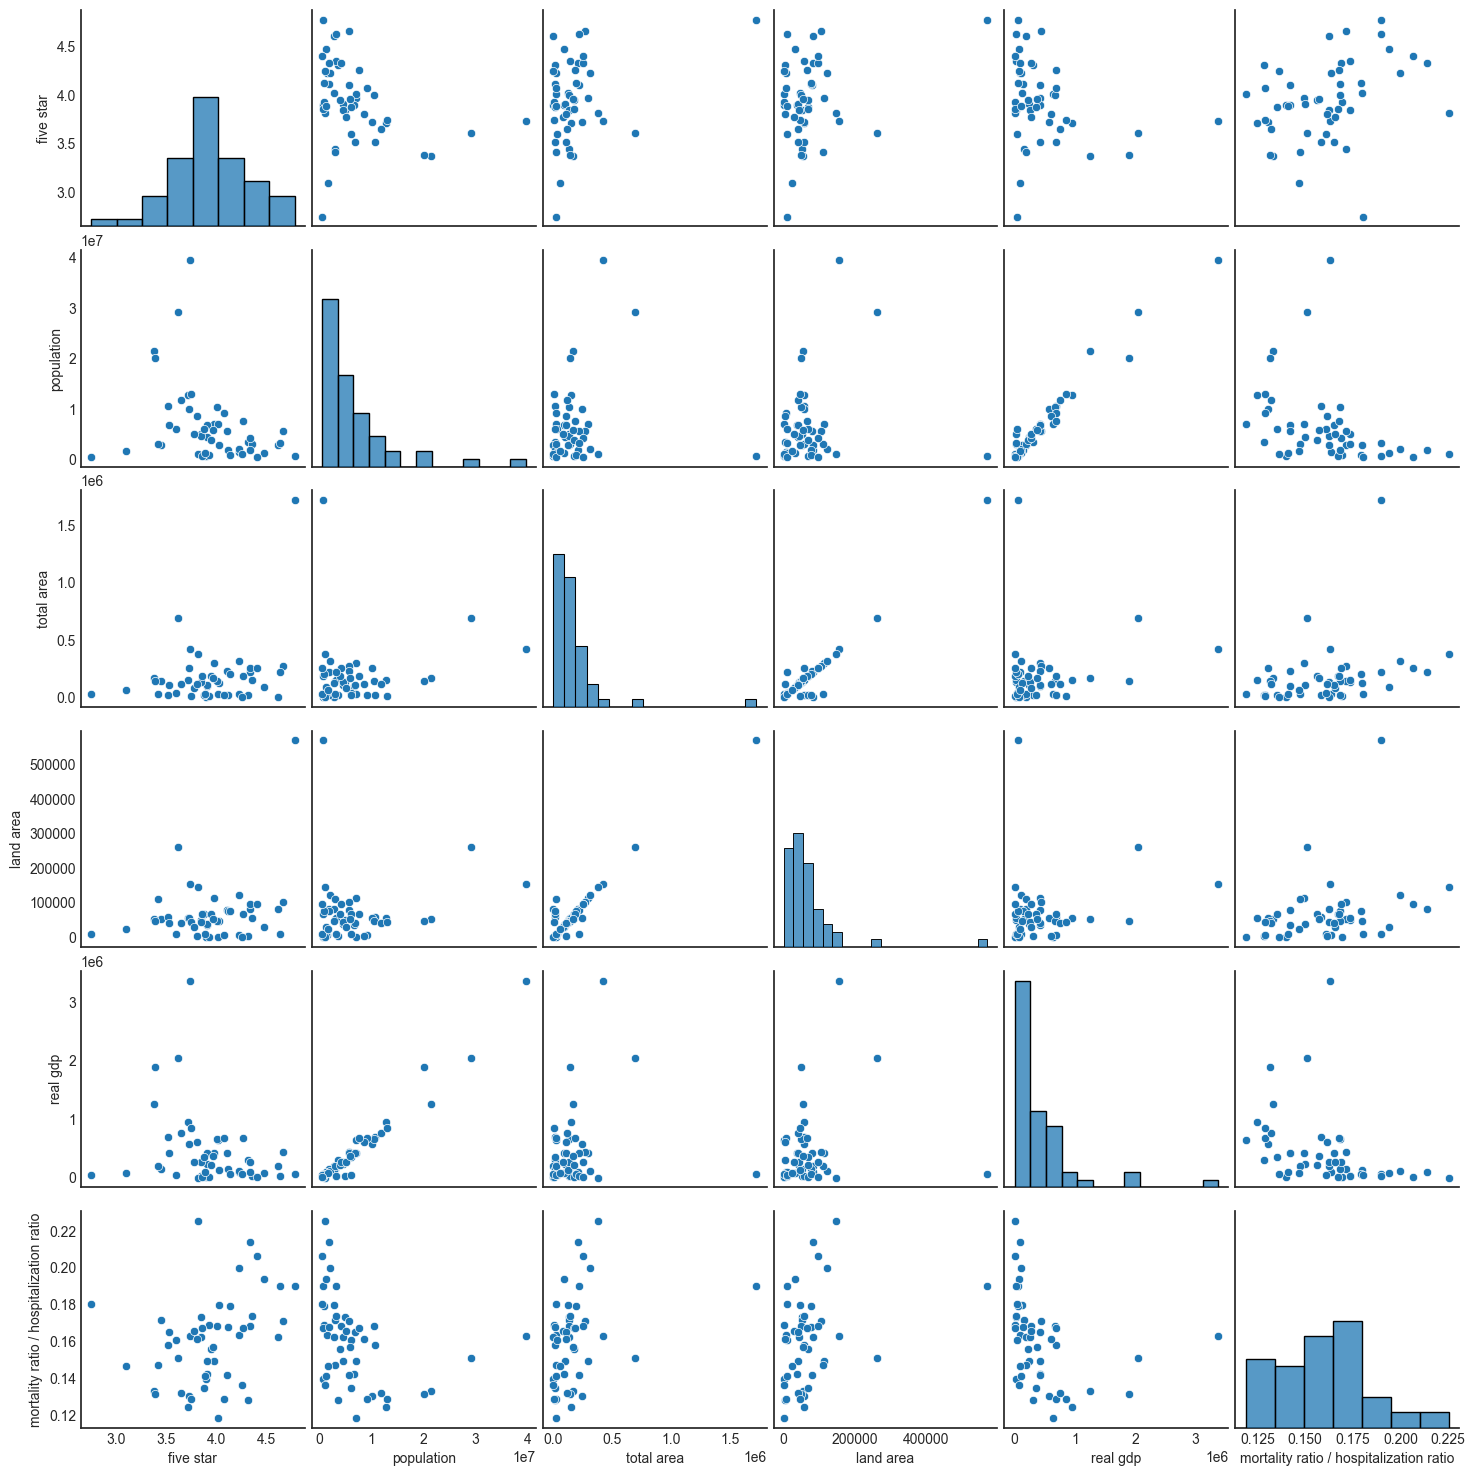

In [15]:
print("Distribuciones y dispersiones para las variables geográficas y la calificación promedio por estado")
sns.pairplot(df_states_agg[["five star",
                        "population",
                        "total area",
                        "land area",
                        "real gdp",
                        "mortality ratio / hospitalization ratio"]])

Escalamos las variables para crear un boxplot que nos permita visualmente, observar la dispersión de los valores de las variables,
como también, las distancias entre máximos y mínimos.


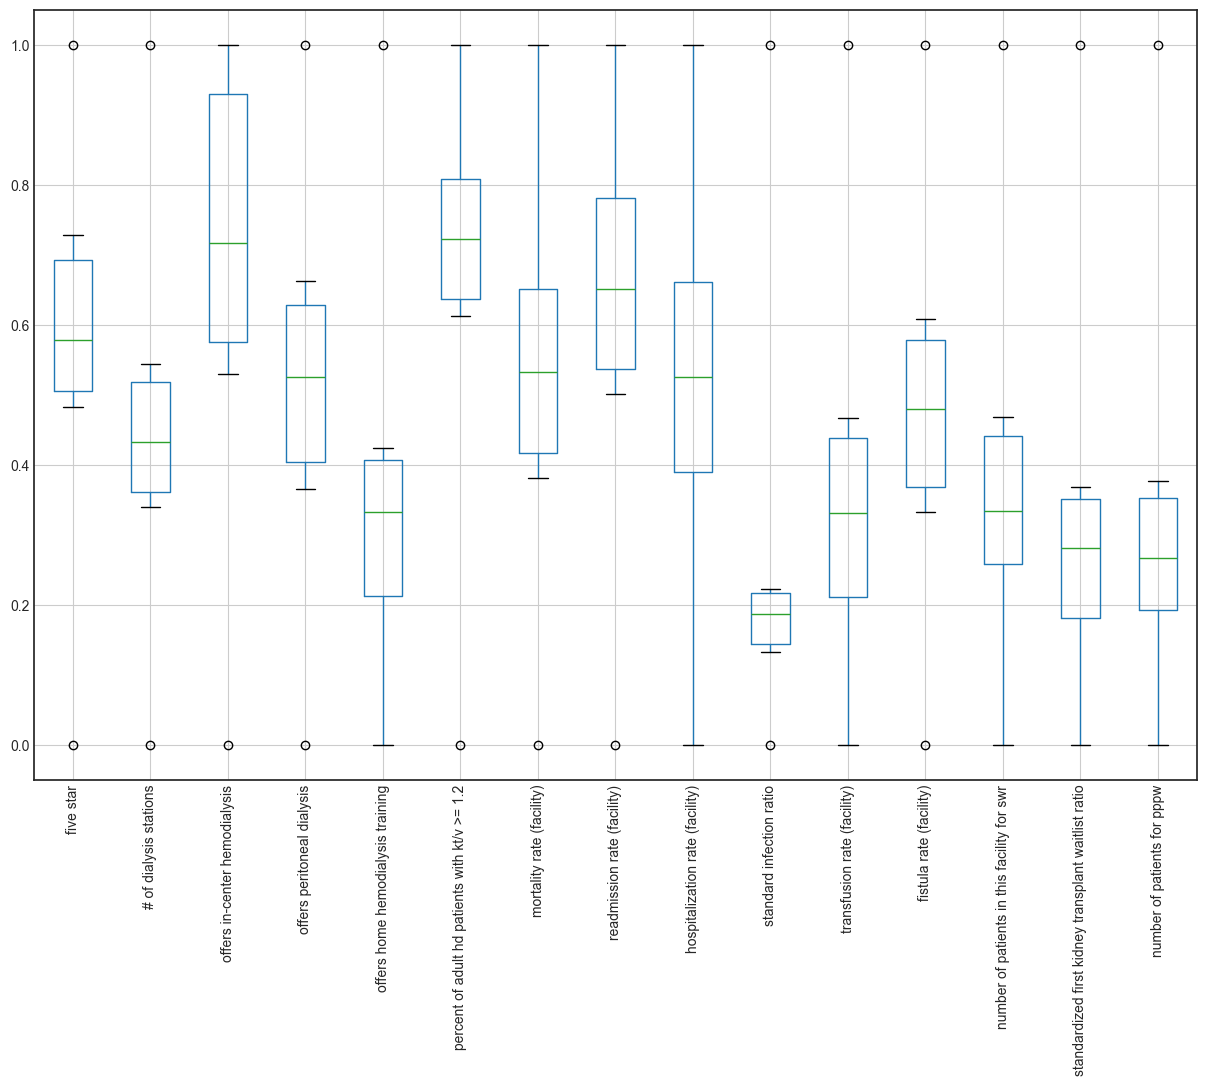

<Figure size 640x480 with 0 Axes>

In [16]:
print("Escalamos las variables para crear un boxplot que nos permita visualmente, observar la dispersión de los valores de las variables,\n"
      "como también, las distancias entre máximos y mínimos.")
fig = plt.figure(figsize = (15,10))
df_describe = df_states_agg[[c for c in df.columns if c in df_states_agg.columns]].describe()
mascara_index = ['mean','min', '25%', '50%', '75%', 'max']
df_desc_summ = df_describe.loc[mascara_index]
columnas_describe = df_desc_summ.columns
data = df_desc_summ.to_numpy()
data = MinMaxScaler().fit_transform(data)
df_desc_summ = pd.DataFrame(data=data, columns=columnas_describe)
df_desc_summ.boxplot()
plt.xticks(rotation=90)
plt.show()
plt.clf()

La función del boxplot, en nuestro caso, es la de visualizar donde se sitúan las medias y cuartiles respecto de sus máximos y mínimos. Utilizamos el método MinMaxScaler para que las variables estén todas dentro de un rango que permita ver mejor las escalas.

Creamos un matriz de correlaciones para las variables que estén fuertemente relacionadas.
Existen 10 variables correlacionadas (con un umbral de 0.7), que son las siguientes:
Se proceden a eliminar.
* offers home hemodialysis training
* % of adult patients with serum PO4 greater than 7.0 mg/dl
* hospitalization rate (facility)
* number of patients in this facility for swr
* number of patients for pppw
* % of prevalent patients waitlisted
* population
* land area
* real gdp
* mortality ratio / hospitalization ratio


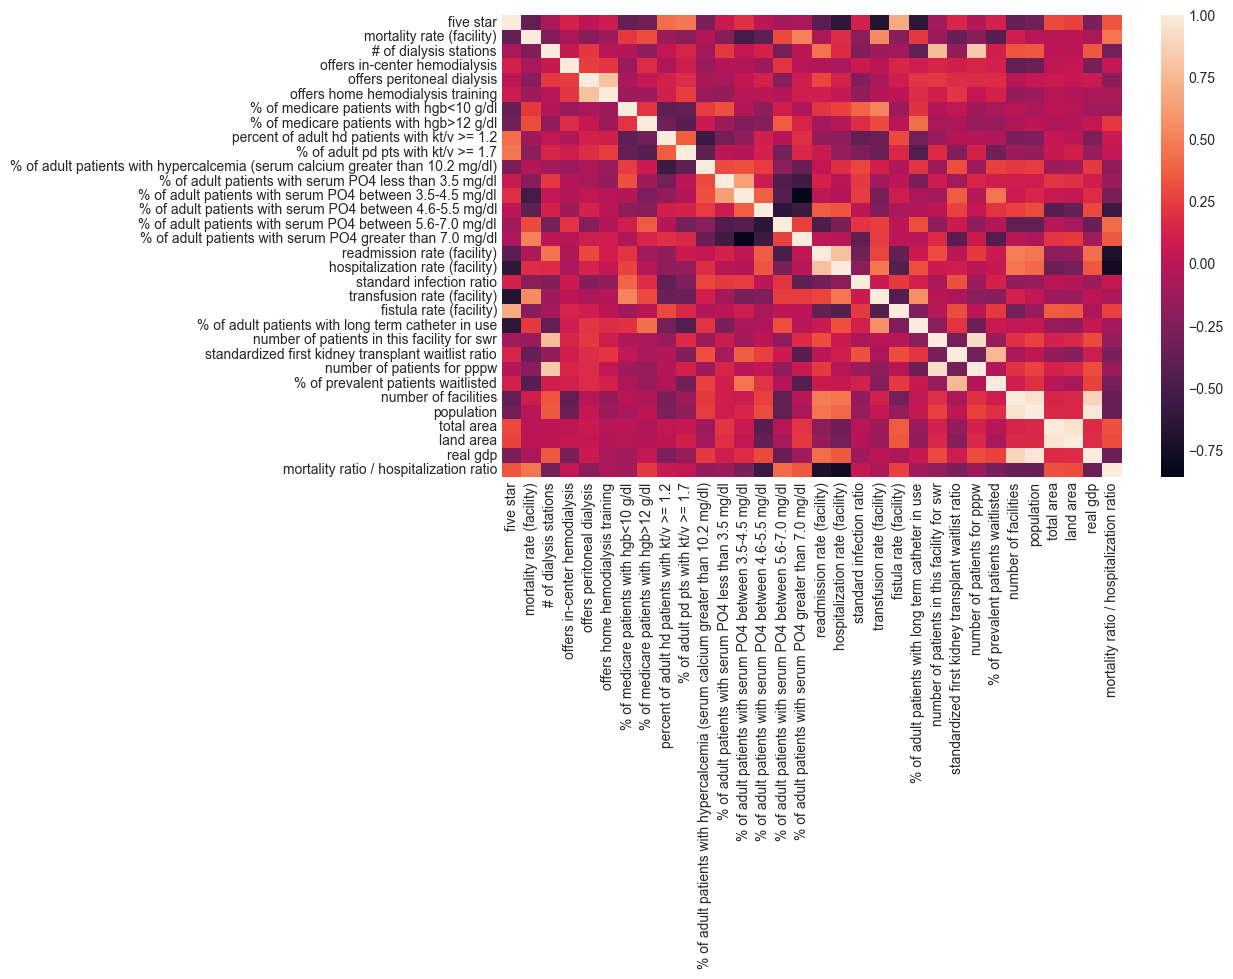

In [17]:
print("Creamos un matriz de correlaciones para las variables que estén fuertemente relacionadas.")
plt.figure(figsize=(10, 6))
umbral = 0.7
df_corr = df_states_agg.drop(columns="state").corr()
sns.heatmap(df_corr)
columnas = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if abs(df_corr.iloc[i,j]) >= umbral:
            if columnas[j]:
                columnas[j] = False
columnas_correlacionadas = df_states_agg.drop(columns="state").columns[~columnas].values.tolist()
print(f"Existen {len(columnas_correlacionadas)} variables correlacionadas (con un umbral de {umbral}), que son las siguientes:")
print("Se proceden a eliminar.")
for i in columnas_correlacionadas:
    print(f"* {i}")
df_states_corr = df_states_agg.drop(columns="state").loc[:, columnas]

Utilizamos una matriz de correlaciones para analizar correlaciones fuertes entre variables y prevenir efectos de multicolinealidad en siguientes análisis. Con un umbral determinado previamente, procedemos a eliminar variables fuertemente correlacionadas, manteniendo solo una de ellas, que será la representativa a utilizar (por ejemplo en una regresión).

In [18]:
print("Regresión para formalizar relaciones entre las variables dependientes y el rating del centro médico")
X = df_states_corr.iloc[:, 1:]
X = sm.add_constant(X)
Y = df_states_corr.loc[:, "five star"]
modelo_reg = sm.OLS(Y, X).fit()
display(modelo_reg.summary())
p_val_df = modelo_reg.summary2().tables[1][modelo_reg.summary2().tables[1]["P>|t|"]<=0.05]
print("La regresión nos permite ver (teniendo en cuenta las variables suministradas) que solo las siguientes son significativas\n"
      "para entender mejor la clasificación promedio de cada estado.")
display(p_val_df)

Regresión para formalizar relaciones entre las variables dependientes y el rating del centro médico


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              five star   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     11.08
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.17e-09
Time:                        19:40:34   Log-Likelihood:                 31.114
No. Observations:                  51   AIC:                            -18.23
Df Residuals:                      29   BIC:                             24.27
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                              4.6572      6.060      0.769      0.448      -7.736      17.050
mortality rate (facility)                                                         -0.0014      0.022     -0.062      0.951      -0.047       0.044
# of dialysis stations                                                            -0.0256      0.013     -1.897      0.068      -0.053       0.002
offers in-center hemodialysis                                                     -0.1480      1.406     -0.105      0.917      -3.024       2.728
offers peritoneal dialysis                                                         0.2482      0.276      0.900      0.375      -0.316       0.812
% of medicare patients with hgb<10 g/dl                                           -0.0145      0.013     -1.150      0.260      -0.040       0.011
% of medicare patients with hgb>12 g/dl                                           -0.0317      0.126     -0.253      0.802      -0.289       0.225
percent of adult hd patients with kt/v >= 1.2                                     -0.0214      0.049     -0.434      0.667      -0.122       0.080
% of adult pd pts with kt/v >= 1.7                                                 0.0125      0.014      0.915      0.368      -0.015       0.040
% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)    -0.0654      0.051     -1.289      0.207      -0.169       0.038
% of adult patients with serum PO4 less than 3.5 mg/dl                            -0.0293      0.058     -0.504      0.618      -0.148       0.090
% of adult patients with serum PO4 between 3.5-4.5 mg/dl                           0.0301      0.039      0.771      0.447      -0.050       0.110
% of adult patients with serum PO4 between 4.6-5.5 mg/dl                           0.0105      0.035      0.303      0.764      -0.061       0.082
% of adult patients with serum PO4 between 5.6-7.0 mg/dl                          -0.0002      0.044     -0.005      0.996      -0.089       0.089
readmission rate (facility)                                                       -0.0083      0.022     -0.376      0.710      -0.053       0.037
standard infection ratio                                                           0.1566      0.207      0.756      0.455      -0.267       0.580
transfusion rate (facility)                                                       -0.0047      0.007     -0.647      0.523      -0.019       0.010
fistula rate (facility)                                                            0.0253      0.009      2.671      0.012       0.006       0.

La regresión nos permite ver (teniendo en cuenta las variables suministradas) que solo las siguientes son significativas
para entender mejor la clasificación promedio de cada estado.


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
fistula rate (facility),0.025263,0.009459,2.670785,0.012276,0.005917,0.044609
% of adult patients with long term catheter in use,-0.068326,0.015940,-4.286400,0.000183,-0.100928,-0.035725


Obtenemos una regresión con un r^2 alto y robusta, según indican los estadísticos. En este caso, la utilización del método de fistula como acceso venoso mejora la calificación. En los documentos esto está comprabado, con lo cual obtenemos un resultado lógico. Encontramos que un número alto de pacientes con uso de catéter a largo plazo, empeora la calificación. Según los informes, este método es menos deseable y suele traer más complicaciones.  

In [19]:
print("Utilizamos el Z-Score para determinar outliers y ver si logramos una regresión más robusta.")
z_scores = np.abs(zscore(df_states_agg.drop(columns="state"), axis=1))
umbral_z = 5.56
df = df_states_agg.drop(columns="state")[(z_scores < umbral_z).all(axis=1)]
print(f"Nos quedamos con {len(df)} sobre las 51 observaciones previas")

Utilizamos el Z-Score para determinar outliers y ver si logramos una regresión más robusta.
Nos quedamos con 46 sobre las 51 observaciones previas


Dado que la regresión anterior solo dejaba como significativas 2 variables, pocedemos a probar quitando posibles outliers de la muestra. Utilizamos el método del z-score, junto a un umbral, para determinarlos. Cabe aclarar que el z-score mide las desviaciones del punto respecto de la media. Con lo cual eliminamos observaciones fuertemente desviadas que puedan estar ensuciando el análisis.

In [20]:
print("Regresión para formalizar relaciones entre las variables dependientes y el rating del centro médico")
X = df.iloc[:, 1:]
X = sm.add_constant(X)
Y = df.loc[:, "five star"]
modelo_reg = sm.OLS(Y, X).fit()
display(modelo_reg.summary())
p_val_df = modelo_reg.summary2().tables[1][modelo_reg.summary2().tables[1]["P>|t|"]<=0.05]
print("La regresión nos permite ver (teniendo en cuenta las variables suministradas) que solo las siguientes son significativas\n"
      "para entender mejor la clasificación promedio de cada estado.")
display(p_val_df)

Regresión para formalizar relaciones entre las variables dependientes y el rating del centro médico


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              five star   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     14.57
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.13e-06
Time:                        19:40:34   Log-Likelihood:                 56.578
No. Observations:                  46   AIC:                            -49.16
Df Residuals:                      14   BIC:                             9.360
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                            -77.1815     40.513     -1.905      0.078    -164.073       9.710
mortality rate (facility)                                                         -0.1022      0.088     -1.165      0.263      -0.290       0.086
# of dialysis stations                                                            -0.0024      0.023     -0.101      0.921      -0.053       0.048
offers in-center hemodialysis                                                      1.3227      1.395      0.948      0.359      -1.670       4.315
offers peritoneal dialysis                                                        -0.7058      0.438     -1.610      0.130      -1.646       0.235
offers home hemodialysis training                                                  1.1385      0.419      2.720      0.017       0.241       2.036
% of medicare patients with hgb<10 g/dl                                           -0.0178      0.013     -1.412      0.180      -0.045       0.009
% of medicare patients with hgb>12 g/dl                                            0.0572      0.150      0.382      0.708      -0.264       0.379
percent of adult hd patients with kt/v >= 1.2                                      0.0844      0.061      1.389      0.187      -0.046       0.215
% of adult pd pts with kt/v >= 1.7                                                -0.0315      0.020     -1.540      0.146      -0.075       0.012
% of adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dl)     0.0319      0.054      0.586      0.567      -0.085       0.149
% of adult patients with serum PO4 less than 3.5 mg/dl                             0.7271      0.402      1.807      0.092      -0.136       1.590
% of adult patients with serum PO4 between 3.5-4.5 mg/dl                           0.7518      0.389      1.935      0.074      -0.082       1.585
% of adult patients with serum PO4 between 4.6-5.5 mg/dl                           0.7190      0.396      1.818      0.091      -0.129       1.567
% of adult patients with serum PO4 between 5.6-7.0 mg/dl                           0.7492      0.392      1.914      0.076      -0.091       1.589
% of adult patients with serum PO4 greater than 7.0 mg/dl                          0.7176      0.395      1.818      0.091      -0.129       1.564
readmission rate (facility)                                                        0.0611      0.027      2.271      0.039       0.003       0.119
hospitalization rate (facility)                                                   -0.0004      0.015     -0.025      0.981      -0.032       0.

La regresión nos permite ver (teniendo en cuenta las variables suministradas) que solo las siguientes son significativas
para entender mejor la clasificación promedio de cada estado.


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
offers home hemodialysis training,1.138543,0.418655,2.719524,0.016609,0.240617,2.036469
readmission rate (facility),0.061143,0.026923,2.271023,0.039456,0.003399,0.118888
fistula rate (facility),0.037783,0.010184,3.709884,0.002331,0.015940,0.059627
% of adult patients with long term catheter in use,-0.070792,0.014684,-4.821025,0.000272,-0.102286,-0.039298
number of patients for pppw,-0.021040,0.009163,-2.296238,0.037618,-0.040693,-0.001388


Para este segundo caso, vemos que eliminar outliers permite obtener un mayor número de variables significativas.
Mejora significativamente varios estadísticos, entre ellos el r^2.


C:\Users\MEC\AppData\Local\Temp\ipykernel_15708\196398287.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(label, (df_pca["pca"][i], df_pca["five star"][i]), fontsize=12)


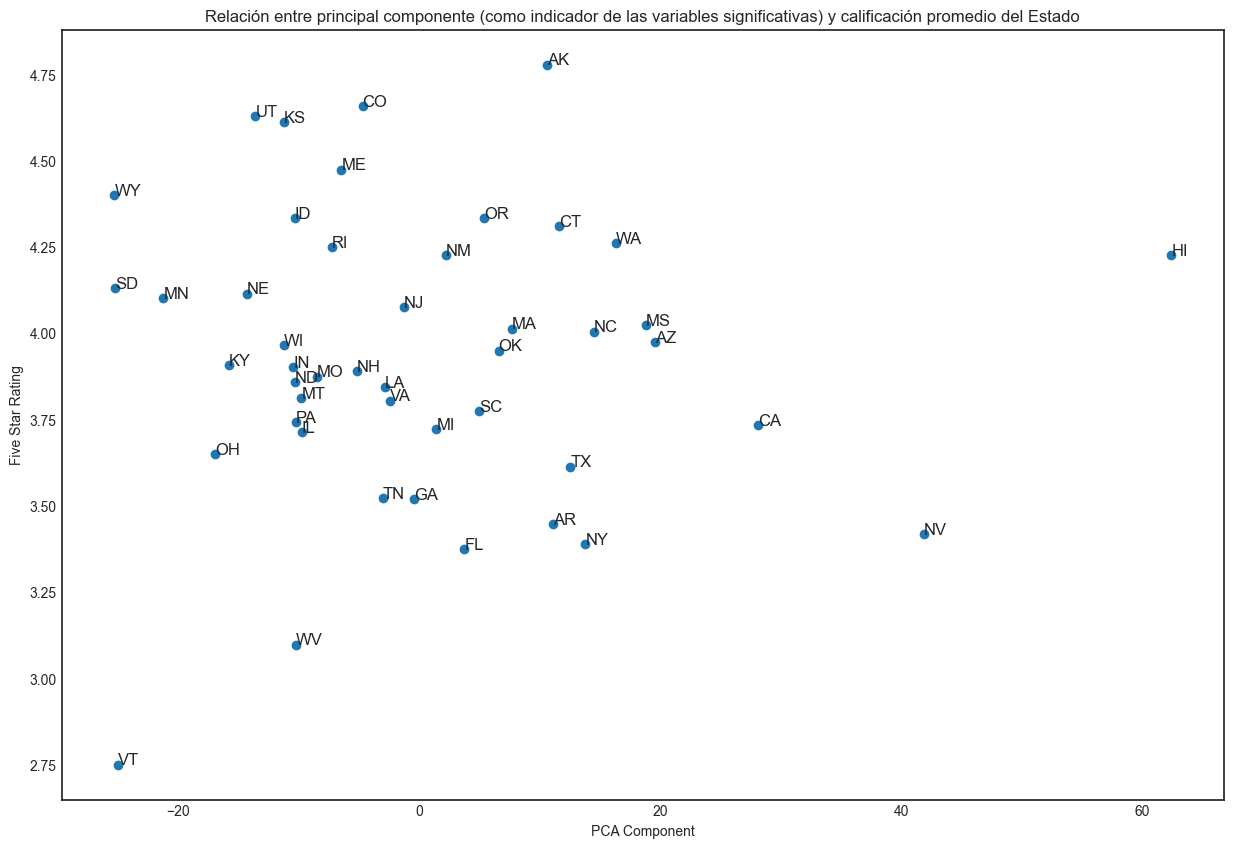

In [21]:
X = df[p_val_df.index.values.tolist()]
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame({"pca": X_pca[:, 0], "five star": df["five star"]})
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df_pca["pca"], df_pca["five star"])
ax.set_xlabel('PCA Component')
ax.set_ylabel('Five Star Rating')
ax.set_title("Relación entre principal componente (como indicador de las variables significativas) y calificación promedio del Estado")
for i, label in enumerate(df.index):
    ax.annotate(label, (df_pca["pca"][i], df_pca["five star"][i]), fontsize=12)

Mediante el método de principal componente logramos graficar en dos dimensiones. Es una ayuda visual para entender mejor como las variables significativas determinan el mapa de clasificación promedio para cada estado.

**CONCLUSIÓN:**

Tras un exhaustivo análisis, determinamos varios puntos importantes sobre como impactan los indicadores sobre a calificación promedio de cada estado:

1) La diferencia observada de calificación entre los estados mejor posicionados, respecto de los peores, se relaciona con el uso de los mejores métodos disponibles para tratar a los pacientes, acompañado los más altos porcentajes de pacientes con indicadores de salud (hemoglobina o Kv/t por ejemplo) cumpliendo los umbrales establecidos por la autoridad sanitaria. Menores tasas de pacientes con transfusiones o en lista de espera por tiempos menos extensos, mejora el rating. Mayores tasas de hospitalización resultaron en peores calificaciones.

2) Varias de estas relaciones se observaron gráficamente.

3) Respecto de las regresiones:

    * Las variables geográficas resultaron no significativas.

    * Solo variables médicas resultaron significativas.
    
    * Resultaron significativas variables relacionadas a los métodos de dialisis provistos (catéter o fistula), las re-admisiones a los centros, los pacientes prevalentes en lista de espera para transplante, y si el centro ofrece entrenamiento para que los pacientes se realicen las diálsis en su hogar.